<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/%EC%95%99%EC%83%81%EB%B8%94_%EC%97%B0%EC%8A%B5(%EC%87%BC%ED%95%91%EB%AA%B0%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

In [2]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
#fm._rebuild()

Text(0.5, 1.0, '안녕!')

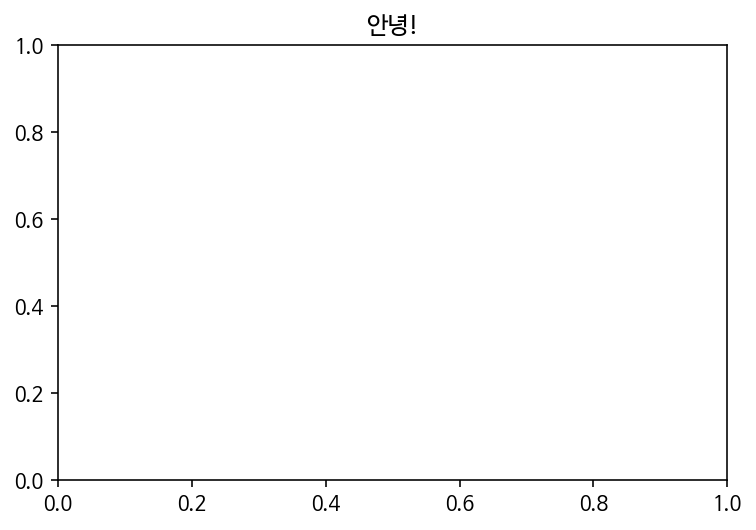

In [5]:
plt.title('안녕!')

In [8]:
df = pd.read_excel('/content/쇼핑몰프로젝트합2019.xlsx')
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,A.2O대,291,98.7,10.9,18.6,22.8,47.7,3.3,83.20
1,2019,생활/취미/사무용품/인테리어/골프용품,휴일,일,F.22-02시,M,B.3O대,51,86.3,14.6,21.3,22.4,41.7,2.9,25.30
2,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,B.3O대,758,96.9,10.7,17.0,21.4,50.9,3.6,56.75
3,2019,생활/취미/사무용품/인테리어/골프용품,평일,화,C.10-14시,M,D.5O대,122,39.0,23.5,21.2,14.6,40.7,2.5,29.25
4,2019,생활/취미/사무용품/인테리어/골프용품,휴일,월,D.14-18시,F,E.60대이상,10,14.5,24.4,27.1,12.9,35.5,2.7,6.60


## 일:1, 월:2, 화:3, 수:4, 목:5, 금:6, 토:7로 바꿈
## 휴일:0, 평일:1
##


In [9]:
df.isnull().sum()

CRI_YM                   0
TAG                      0
평일휴일                     0
요일                       0
시간대                      0
성별                       0
연령대                      0
건수합계                     0
인터넷 쇼핑 이용자 비율 (%)        0
월 평균 구매빈도-1회 미만 (%)      0
월 평균 구매빈도-1~2회 미만 (%)    0
월 평균 구매빈도-2~3회 미만 (%)    0
월 평균 구매빈도-3회 이상 (%)      0
월 평균 구매빈도-평균 (회)         0
네이버 태그 클릭량               0
dtype: int64

In [10]:
df.columns

Index(['CRI_YM', 'TAG', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)',
       '네이버 태그 클릭량'],
      dtype='object')

In [11]:
# 라벨인코딩을 하여 수치가 아닌 값들을 수치화해주자.
encoder = LabelEncoder()
df['평일휴일'] = encoder.fit_transform(df['평일휴일'])


In [12]:
encoder1 = LabelEncoder()
df['요일'] = encoder1.fit_transform(df['요일'])

In [13]:
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

df['시간대'] = encoder2.fit_transform(df['시간대'])
df['성별'] = encoder3.fit_transform(df['성별'])
df['연령대'] = encoder4.fit_transform(df['연령대'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRI_YM                 6855 non-null   int64  
 1   TAG                    6855 non-null   object 
 2   평일휴일                   6855 non-null   int64  
 3   요일                     6855 non-null   int64  
 4   시간대                    6855 non-null   int64  
 5   성별                     6855 non-null   int64  
 6   연령대                    6855 non-null   int64  
 7   건수합계                   6855 non-null   int64  
 8   인터넷 쇼핑 이용자 비율 (%)      6855 non-null   float64
 9   월 평균 구매빈도-1회 미만 (%)    6855 non-null   float64
 10  월 평균 구매빈도-1~2회 미만 (%)  6855 non-null   float64
 11  월 평균 구매빈도-2~3회 미만 (%)  6855 non-null   float64
 12  월 평균 구매빈도-3회 이상 (%)    6855 non-null   float64
 13  월 평균 구매빈도-평균 (회)       6855 non-null   float64
 14  네이버 태그 클릭량             6855 non-null   float64
dtypes: f

In [15]:
#tag컬럼에서 '홈쇼핑'값을 없애보자-> 어케함...
#df.drop(df['TAG']['홈쇼핑'],inplace=True)
#df.head()

In [16]:
df.loc[1]

CRI_YM                                   2019
TAG                      생활/취미/사무용품/인테리어/골프용품
평일휴일                                        1
요일                                          4
시간대                                         5
성별                                          1
연령대                                         1
건수합계                                       51
인터넷 쇼핑 이용자 비율 (%)                        86.3
월 평균 구매빈도-1회 미만 (%)                      14.6
월 평균 구매빈도-1~2회 미만 (%)                    21.3
월 평균 구매빈도-2~3회 미만 (%)                    22.4
월 평균 구매빈도-3회 이상 (%)                      41.7
월 평균 구매빈도-평균 (회)                          2.9
네이버 태그 클릭량                               25.3
Name: 1, dtype: object

In [17]:
#라벨인코딩을 해주자
# 지금데이터는 안해줘도 됨. 다 수치화해서

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)','네이버 태그 클릭량']],
    df['TAG'],
    test_size=0.2,
    random_state=42

)

In [19]:
X_train.shape, X_test.shape

((5484, 14), (1371, 14))

In [20]:
y_train.shape, y_test.shape

((5484,), (1371,))

In [21]:
y_train[:10]

5049                     식료품
5525                  패션/화장품
297     생활/취미/사무용품/인테리어/골프용품
303     생활/취미/사무용품/인테리어/골프용품
6058                  패션/화장품
3481    생활/취미/사무용품/인테리어/골프용품
2996    생활/취미/사무용품/인테리어/골프용품
5466                  패션/화장품
5582                  패션/화장품
655     생활/취미/사무용품/인테리어/골프용품
Name: TAG, dtype: object

In [22]:
## 단일 모델들에 대한 객체 생성
## voting(hard/soft)

In [23]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    max_features = 14,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=14, random_state=100)

In [24]:
svc = SVC(
    kernel = 'rbf',
    C=0.1,
    gamma=10,
    probability=True,
    random_state = 10
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, probability=True, random_state=10)

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
dt_predt = dt.predict(X_test)

In [27]:
svc_predt = svc.predict(X_test)

In [28]:
lr_predt = lr.predict(X_test)

In [31]:
dt_acc = accuracy_score(y_test, dt_predt)
svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc, svc_acc, lr_acc

(0.9445660102115244, 0.6075857038657914, 0.9452954048140044)

In [ ]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='hard'
)
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

NameError: ignored

In [ ]:
## 소프트 보팅
# voting_clf2 = VotingClassifier(
#     estimators= [
#         ('decision tree', dt), 
#         ('svc', svc), 
#         ('lr', lr)
#     ],
#     weights=[1, 1, 1],
#     voting='soft'
# )
# voting_clf2.fit(X_train, y_train)
# soft_voting_predicted = voting_clf2.predict(X_test)
# accuracy_score(y_test, soft_voting_predicted)

In [ ]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline

# x = np.arange(2)
# plt.bar(x, height= [
#                     accuracy_score(y_test, hard_voting_predicted),
#                     accuracy_score(y_test, soft_voting_predicted)
#             ])
# plt.xticks(x, ['hard voting','soft voting']);

In [ ]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.60425

In [ ]:
# x = np.arange(3)
# plt.bar(x, height= [
#                     accuracy_score(y_test, hard_voting_predicted),
#                     accuracy_score(y_test, soft_voting_predicted),
#                     accuracy_score(y_test, rf_predt)
#             ])
# plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [ ]:
# confusion_matrix(y_test, soft_voting_predicted)

In [ ]:
confusion_matrix(y_test, rf_predt)

array([[2405,    0,    0,    2],
       [ 298,    0,    0,    0],
       [ 324,    0,    0,    0],
       [ 959,    0,    0,   12]])

In [ ]:
gbc = GradientBoostingClassifier(
     random_state=42
).fit(X_train, y_train)

In [ ]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.62475